# 0. Selección de casos de análisis

El conjunto de entrenamiento está formado por 94,446 imagenes adquiridas de 44 pacientes. El archivo TrainingSet_20aimVO.csv contiene el nombre de cada una de las imagenes y la clase a la que pertenece.

Las clases contempladas son 4:
0. Squamous epithelium (tejido saludable)
1. Intestinal Metaplasia (tejido del esofajo que se ha transformado en tejido intestinal)
2. Gastric Metaplasia (tejido gastrico cercano a la unión con el esófago)
3. Displasya/Cancer (celulas pre-cancerosas/Cáncer)

Para nuestro clasificador binomial utilizaremos solamente las imagenes de tejido sano y de células pre-cancerígenas o cancerígenas.

El presente Notebook crea un subconjunto de imágenes reducidas a la mitad del tamaño, con los casos que usaremos en el clasificador con Perceptrón.


## Paso 1. Cargar librerías y módulos requerdidos

In [ ]:
import os
import random
import numpy as np
import pandas as pd
from skimage.transform import rescale
from skimage import io
import matplotlib.pyplot as plt
from matplotlib import image

%matplotlib inline

## Paso 2. Lectura de datos.

- imágenes(X)
- etiquetas(Y).

In [ ]:
path = 'C:\\Users\\anais\\Documents\\Datos\\Cáncer Esofago_challenge 11\\'
train_df = pd.read_csv(path+"TrainingSet_20aimVO.csv")

In [ ]:
train_df.head()

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0


In [ ]:
train_df['class_number'].value_counts(sort=False)

0    1469
1    3177
2    1206
3    3594
Name: class_number, dtype: int64

In [ ]:
train_df.shape

(9446, 2)

### 2.1  Seleccionamos las imagenes de tejido sano y tejido con cancer

In [ ]:
dat = train_df[(train_df.class_number == 0) |(train_df.class_number == 3 )]  #Seleccionamos solamente las imagenes de tejido
                                                                               #sano y tejido con cancer
dat = dat.replace(3,1)   #Renombramos la clase 3 como clase 1

dat.shape

(5063, 2)

In [ ]:
dat.head()

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0


In [ ]:
dat.class_number.value_counts(sort=False)

0    1469
1    3594
Name: class_number, dtype: int64

In [ ]:
dat.image_filename.nunique()

5063

In [ ]:
dat = dat.reset_index(drop=True)

In [ ]:

dat.to_csv('ClasesImagenes.csv',index=False)

### 2.2  Exploramos el formato de las imagenes mediante un ejemplo

Cuando cargamos una imagen a color, el objeto resultante es una matriz de tres dimensiones, que representa de manera eficiente el nivel de cada pixel entre 0 y 255 (256 niveles discretos de color son suficientes para la percepción del ojo humano)

In [ ]:
datos=dat

In [ ]:
image_path = "C:\\Users\\anais\\Documents\\Datos\\Cáncer Esofago_challenge 11\\TrainingSetImagesDir"
datos['image_filename'] = dat['image_filename'].apply(lambda x: [os.path.join(image_path, x)])
datos['image_filename'] = dat['image_filename'].str.get(0)

datos.head()

,image_filename,class_number
0,C:\Users\anais\Documents\Datos\Cáncer Esofago_...,0
1,C:\Users\anais\Documents\Datos\Cáncer Esofago_...,0
2,C:\Users\anais\Documents\Datos\Cáncer Esofago_...,0
3,C:\Users\anais\Documents\Datos\Cáncer Esofago_...,0
4,C:\Users\anais\Documents\Datos\Cáncer Esofago_...,0


In [ ]:
ejem = io.imread(datos['image_filename'][2693])

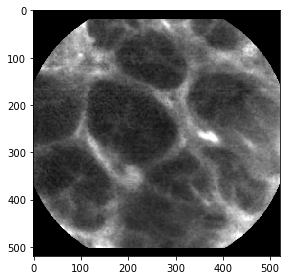

In [ ]:
io.imshow(ejem)
plt.show()

In [ ]:
#Revisamos la dimensión que tiene una sola imagén, en este caso es la primera
ejem.shape


(519, 521, 3)


 «How to Convert a Picture to Numbers». Accedido 12 de mayo de 2020. https://e2eml.school/images_to_numbers.html.

- Dimensión 0: 519 renglones de pixeles de arriba a abajo
- Dimension 1: 521 columnas de pixeles de izquierda a derecha
- Dimension 2: 3 Canales de color (rojo, verde y azul en ese orden) (RGB)

In [ ]:
# Explorando los colores de un pixel cualquiera de la primera imagen.
ejem[240][51]


array([53, 53, 53], dtype=uint8)

Probar la linea anterior con distintos pixeles

Cuando los valores de los tres canales del color RGB son idénticos, se obtiene un tono de gris entre 0 equivalente a negro y 255 equivalente a banco.

### 2.3 Cargamos todas las imágenes de tejido sano y tejido con cáncer

In [ ]:
# Cargamos las imagenes del conjunto d entrenamiento como lista de matrices
# o arreglo de números (np.arrays).

%time img= [io.imread(i, as_gray=True) for i in datos['image_filename'][:]]


Wall time: 3min 37s


In [ ]:
len(img)

5063

In [ ]:
%%time

img_scl = []
for i in range (len(img)):
    scl = rescale(img[i] , 1/2)
    img_scl.append(scl)

Wall time: 7min 10s


In [ ]:
%%time
for i in range(len(img)):
    image.imsave( ('datosCancer/CarpetaImagenes/'+dat.image_filename[i]), img_scl[i])

Wall time: 3min 51s
